Журавлев К. В. ПИ20-1 Лабораторная работа 8

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

**Задание 3**

Выведите информацию о количественных параметрах датасета;

In [ ]:
X = faces.data
y = faces.target

In [ ]:
faces["images"].shape

(400, 64, 64)

In [ ]:
faces["data"].shape

(400, 4096)

**Задание 4**

Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib

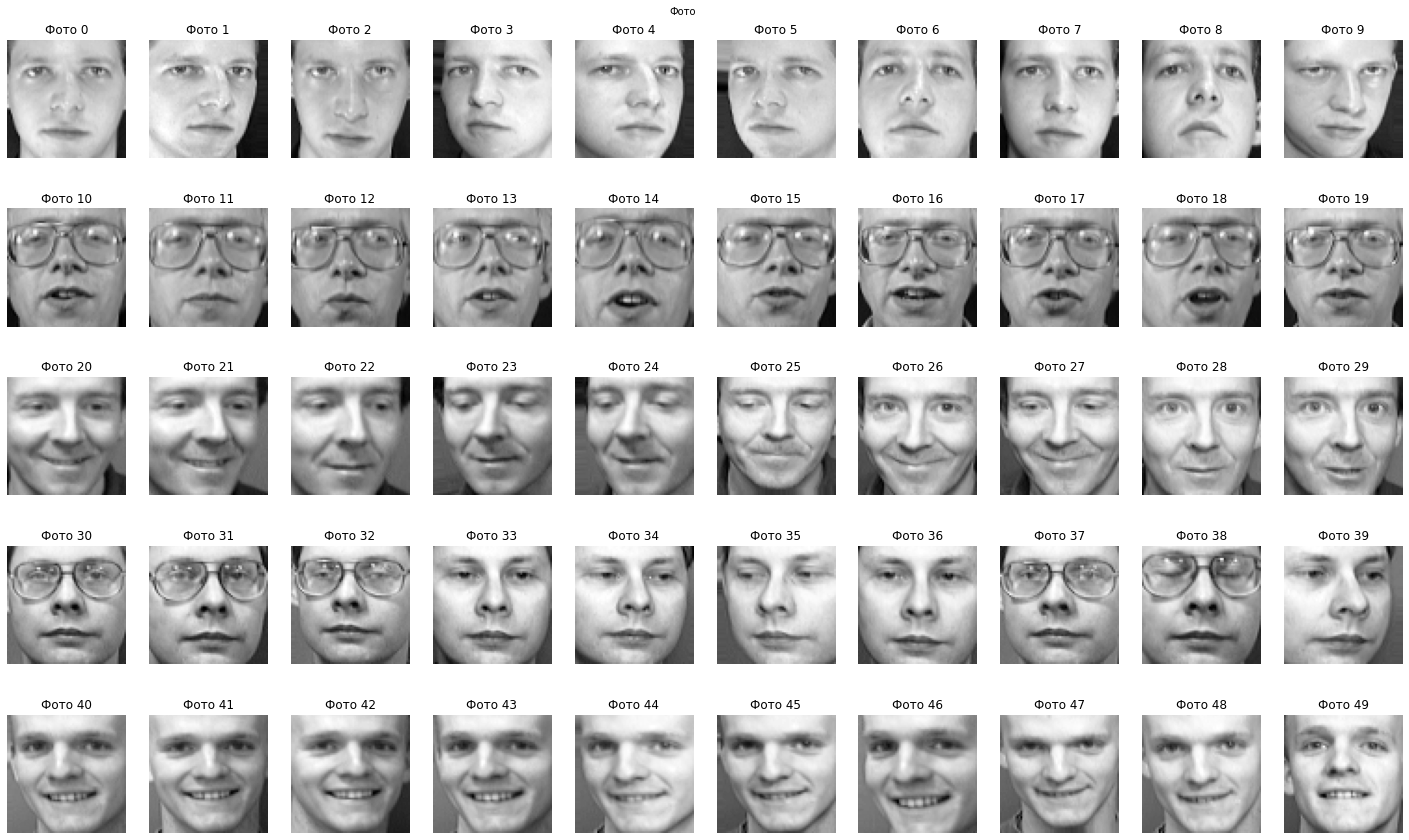

In [ ]:
f=plt.figure(figsize=(25, 15))
f.set(facecolor= 'white')
plt.suptitle('Фото', y = 0.9, fontsize= 10)
n_row = 5
n_col = 10
for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(faces.images[i], cmap=plt.cm.gray)
        plt.axis('off')
        plt.title(f'Фото {i}')
plt.show()

**Задание 5**

Разделите эти данные на тестовую и обучающую выборки


In [ ]:
X = faces.data
y = faces.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Задание 6**

Постройте модель классификатора метода опорных векторов для идентификации человека по изображению


In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
check = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred,
})

print(f'Правильные: \n{check.head(200)}')

Правильные: 
    y_test  y_pred
0       13      13
1       30      30
2       34      34
3       19      19
4       24      24
..     ...     ...
75       1       1
76      36      36
77      30      30
78      36      36
79      32      32

[80 rows x 2 columns]


In [ ]:
bad = check[check['y_test']!=check['y_pred']]
print(f'Неправильные: \n{bad}')
print(f'Сумма неправильных выводов: {(y_test!=y_pred).sum()}')

Неправильные: 
    y_test  y_pred
13      34      39
20      17      22
23      34      39
24      17      22
26       7      39
30      17      22
37      17      22
38      17      22
42       0      15
43       0       7
50      24      12
53      17      22
58       2      39
67       0      39
Сумма неправильных выводов: 14


**Задание 7**

Оцените качество модели на тестовой выборке с помощью следующих метрик

In [ ]:
metrics.accuracy_score(y_pred,y_test)

0.825

In [ ]:
print(metrics.precision_score(y_pred,y_test, average=None))

[0.4        1.         0.5        1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         0.         1.         1.
 1.         1.         1.         0.5        1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.33333333 1.         1.         1.         1.        ]


In [ ]:
print(metrics.recall_score(y_pred,y_test, average=None))

[1.         1.         1.         1.         1.         1.
 1.         0.66666667 1.         1.         1.         0.5
 1.         1.         0.75       0.         1.         1.
 1.         0.14285714 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.16666667]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Задание 8**

Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

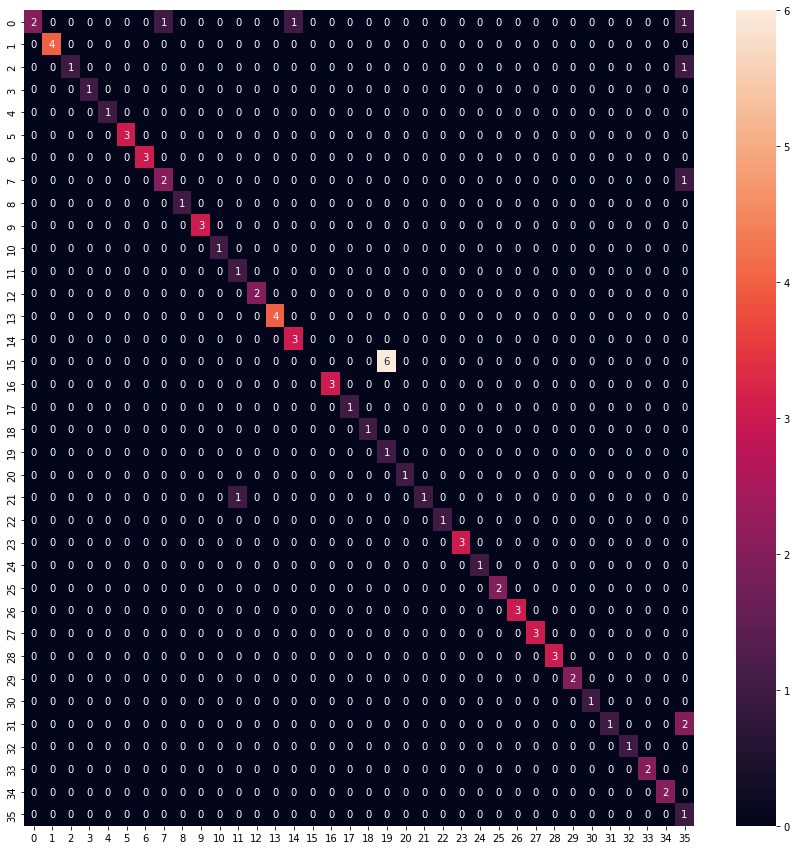

In [ ]:
fix, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot = True)

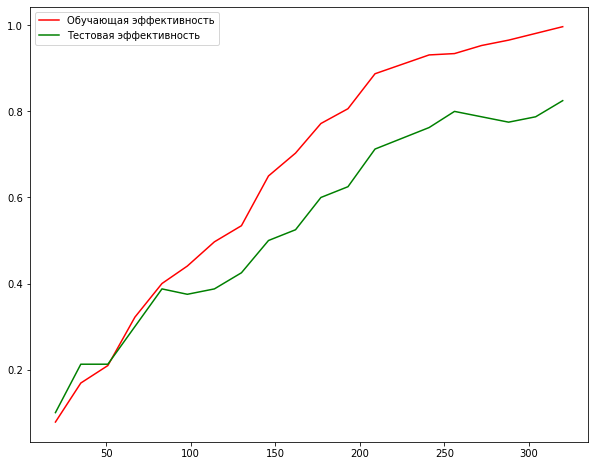

In [ ]:
training_scores = []
test_scores = []
num = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC()
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    num.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 8))
plt.plot(num, training_scores, label="Обучающая эффективность", color = 'red')
plt.plot(num, test_scores, label="Тестовая эффективность", color = 'green')
plt.legend();